# Getting the data

In [4]:
import pandas as pd
import numpy as np
df = pd.read_csv('D:/coursera_data.csv')
df.head()

,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
1,743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
3,413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
4,635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly as py
import plotly.express as px
import cufflinks as cf
%matplotlib inline

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()


# Data cleaning

In [8]:
# Rename columns
df.rename(columns={"course_Certificate_type": "course_certificate_type"}, inplace=True)
df.rename(columns={"Unnamed: 0": "Dataset_number"}, inplace=True)

# student enrollment to actual numbers
def actual_students_numbers(value):
    value=str(value).lower()

    if "k" in value:
        value=int(float(value.replace("k",""))*1000)
    elif "m" in value:
        value=int(float(value.replace("m",""))*1000000)
        
    return int(value)

df["course_students_enrolled"]=df["course_students_enrolled"].apply(actual_students_numbers)

# Strip extra spaces
df["course_title"] = df["course_title"].str.strip()
df["course_organization"] = df["course_title"].str.strip()

# Count null values
print(f"Null values are: { df.isnull().sum()}")

# Count duplicates
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")
# double check without ID

# Drop duplicates
df.drop_duplicates(inplace=True)

print(df.head())

Null values are: Dataset_number              0
course_title                0
course_organization         0
course_certificate_type     0
course_rating               0
course_difficulty           0
course_students_enrolled    0
dtype: int64
Number of duplicate rows: 0
   Dataset_number                                       course_title  \
0             134  (ISC)² Systems Security Certified Practitioner...   
1             743  A Crash Course in Causality:  Inferring Causal...   
2             874                     A Crash Course in Data Science   
3             413                            A Law Student's Toolkit   
4             635                A Life of Happiness and Fulfillment   

                                 course_organization course_certificate_type  \
0  (ISC)² Systems Security Certified Practitioner...          SPECIALIZATION   
1  A Crash Course in Causality:  Inferring Causal...                  COURSE   
2                     A Crash Course in Data Science       

# Exploratory data analysis

# Summary statistics

In [11]:
df.describe()

,Dataset_number,course_rating,course_students_enrolled
count,891.000000,891.000000,8.910000e+02
mean,445.000000,4.677329,9.055208e+04
std,257.353842,0.162225,1.819365e+05
min,0.000000,3.300000,1.500000e+03
25%,222.500000,4.600000,1.750000e+04
50%,445.000000,4.700000,4.200000e+04
75%,667.500000,4.800000,9.950000e+04
max,890.000000,5.000000,3.200000e+06


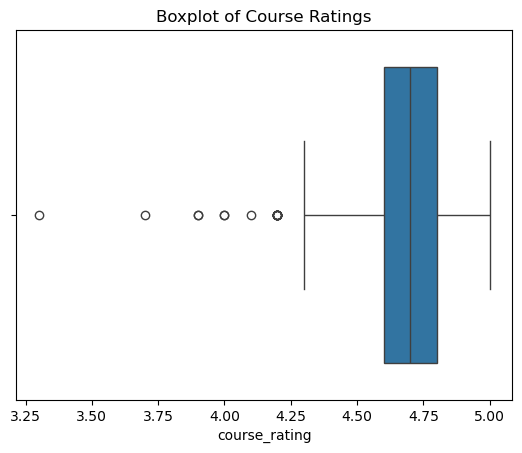

In [12]:
# Box plot for course_rating
sns.boxplot(x=df['course_rating'])
plt.title('Boxplot of Course Ratings')
plt.show()

### *Most courses have high ratings (median near 4.75)*
A few courses received significantly lower ratings (outliers below 4).

### Actions, which should be done, based on our data:
Investigate the outliers: Why are some courses rated so low?
Ensure quality control for courses to maintain high ratings.
Consider promotional strategies for lower-rated courses to improve their reputation.

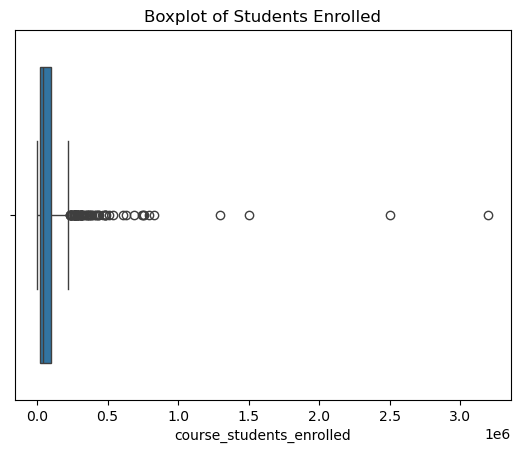

In [14]:
# Box plot for course_students_enrolled
sns.boxplot(x=df['course_students_enrolled'])
plt.title('Boxplot of Students Enrolled')
plt.show()

### A few courses are extremely popular!
The outliers (dots on the right) represent courses that have tens or hundreds of thousands of students enrolled.
Most courses struggle to attract a LARGE audience (small interquartile range).
Based on that, our courses creators can make their courses, having some ideas from "outliers".

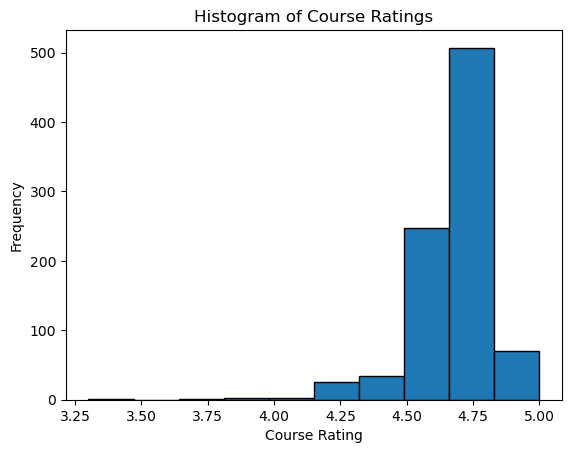

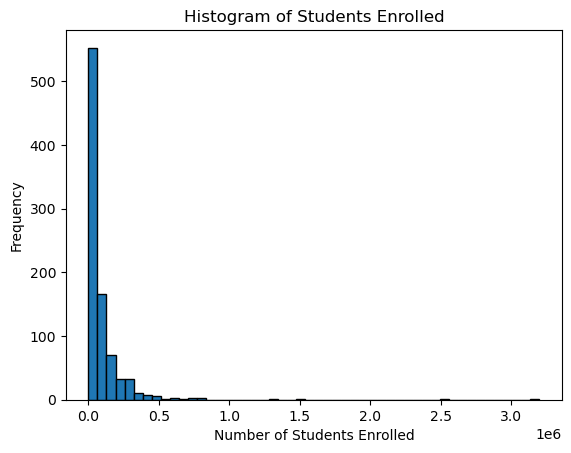

In [16]:
# Histogram for course_rating
plt.hist(df['course_rating'], bins=10, edgecolor='black')
plt.title('Histogram of Course Ratings')
plt.xlabel('Course Rating')
plt.ylabel('Frequency')
plt.show()

# Histogram for course_students_enrolled
plt.hist(df['course_students_enrolled'], bins=50, edgecolor='black')
plt.title('Histogram of Students Enrolled')
plt.xlabel('Number of Students Enrolled')
plt.ylabel('Frequency')
plt.show()

### Observations:
The highest bar is around 4.75, meaning most courses are rated in this range.
The highest bars are close to 0 on the x-axis, meaning most courses have low enrollments.

### Distrubution of Course Difficulty

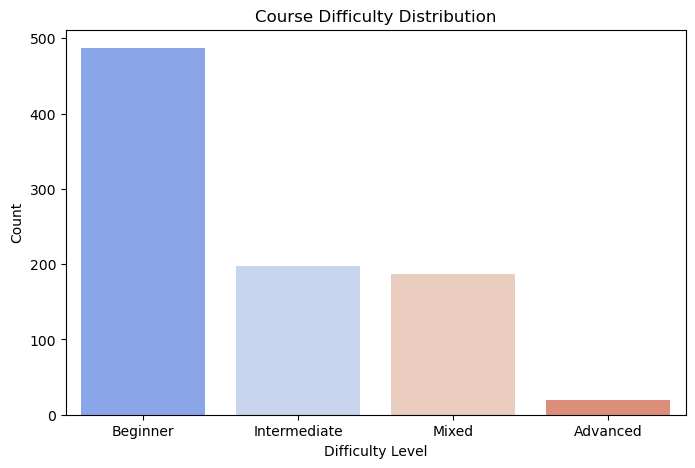

In [19]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df['course_difficulty'], hue=df['course_difficulty'], palette='coolwarm', legend=False)
plt.title('Course Difficulty Distribution')
plt.xlabel('Difficulty Level')
plt.ylabel('Count')
plt.show()

### Observations:
The majority of courses are at an beginner difficulty level.

### Most Popular Courses

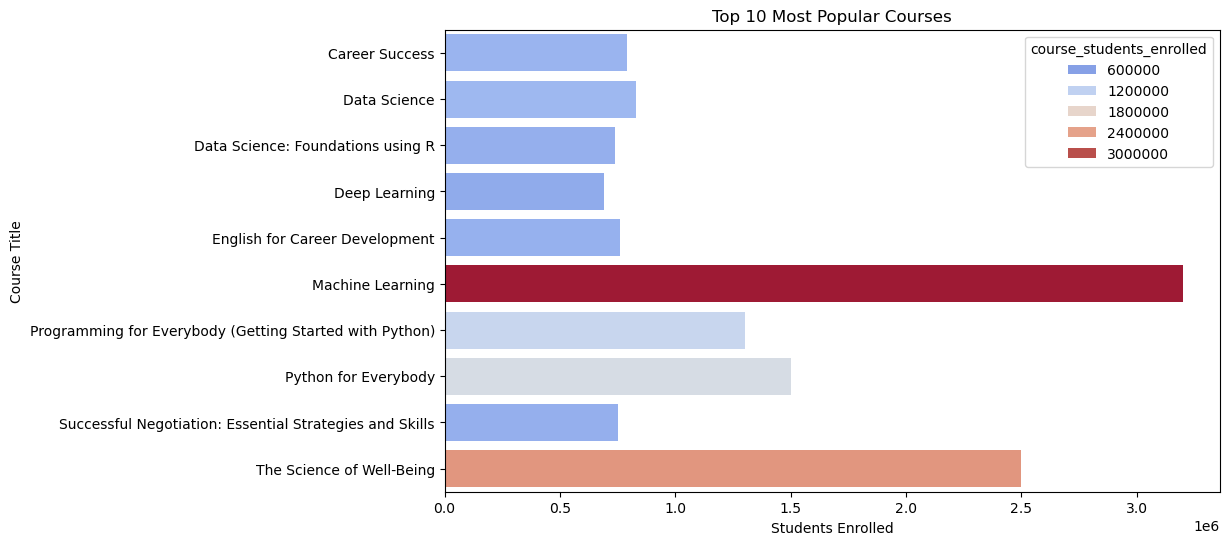

In [22]:
plt.figure(figsize=(10, 6))
top_courses = df.sort_values(by='course_students_enrolled', ascending=False).head(10)
sns.barplot(y=top_courses['course_title'], x=top_courses['course_students_enrolled'], 
            hue=df['course_students_enrolled'], palette='coolwarm')
plt.title('Top 10 Most Popular Courses')
plt.xlabel('Students Enrolled')
plt.ylabel('Course Title')
plt.show()

In [23]:
fig = px.pie(df, names='course_certificate_type', title='Course Certification Types Distribution',
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

### Observations:
Different certification types may have different levels of popularity, influencing course enrollments.
We can see, that "course" is the most popular specialization, most likely timing of receiving the certificate is affecting this choice.

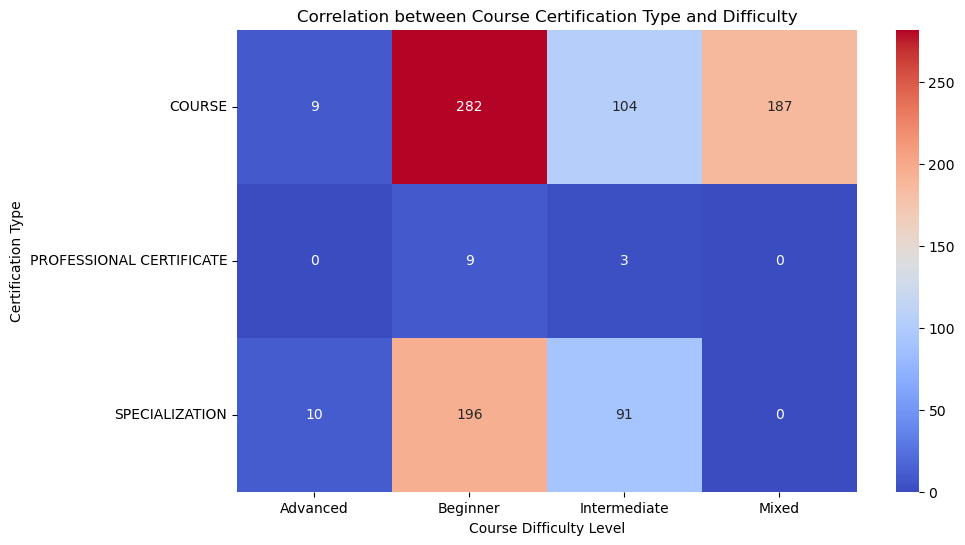

In [38]:
# Create a pivot table to count occurrences
cert_vs_difficulty = df.pivot_table(index='course_certificate_type', 
                                    columns='course_difficulty', 
                                    aggfunc='size', fill_value=0)

# Plot a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cert_vs_difficulty, annot=True, cmap='coolwarm', fmt="d")
plt.title("Correlation between Course Certification Type and Difficulty")
plt.xlabel("Course Difficulty Level")
plt.ylabel("Certification Type")
plt.show()

Most courses are Beginner-friendly, making Coursera more accessible. Professional Certificate programs tend to be easier (likely to attract more learners). Advanced courses are quite rare – there is a gap for expert-level in COursera.

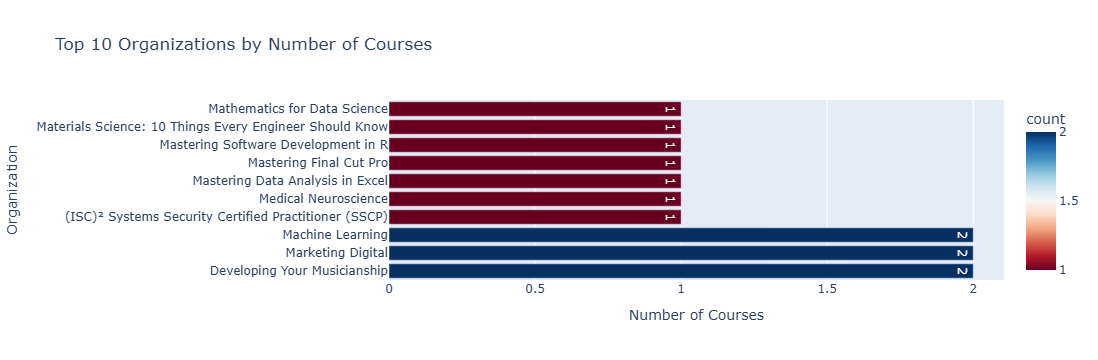

In [25]:
df_top_10_orgs = df['course_organization'].value_counts().head(10).reset_index()
df_top_10_orgs.columns = ['course_organization', 'count']

fig = px.bar(df_top_10_orgs, 
             x='count', 
             y='course_organization', 
             text='count',
             title='Top 10 Organizations by Number of Courses',
             orientation='h', 
             color='count', 
             color_continuous_scale='RdBu')

fig.update_layout(xaxis_title='Number of Courses', 
                  yaxis_title='Organization', 
                  hovermode='y unified')

fig.show()


In [26]:
# Get the top 5 organizations
top_5_orgs = df['course_organization'].value_counts().head(5).index

# Filter dataset for only these organizations
df_top_5_courses = df[df['course_organization'].isin(top_5_orgs)]

# Display the courses offered by these organizations
df_top_5_courses[['course_organization', 'course_title']]

import plotly.figure_factory as ff

table = ff.create_table(df_top_5_courses[['course_organization', 'course_title']].head(20))
table.show()


### Course ratings vs Students Enrolled

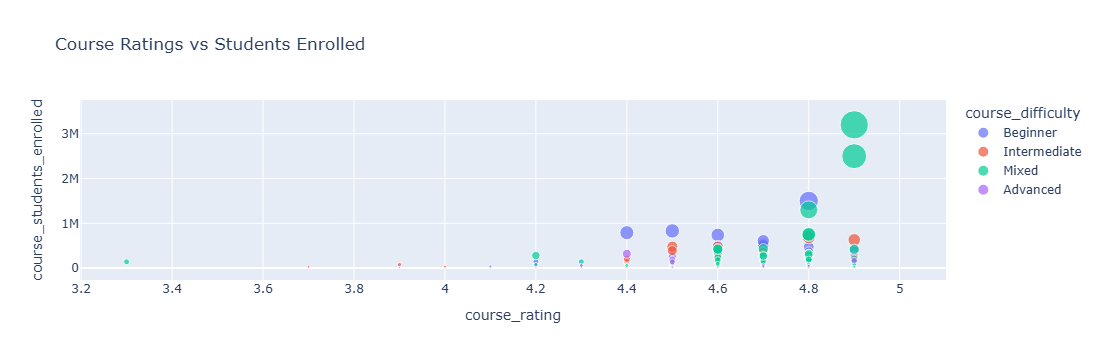

In [28]:
fig = px.scatter(df, x='course_rating', y='course_students_enrolled', 
                 size='course_students_enrolled', color='course_difficulty', 
                 hover_data=['course_title', 'course_organization'], 
                 title='Course Ratings vs Students Enrolled')
fig.show()

# Observations

We can see, that some of our courses are not even importantly being for beginners to be popular. Most likely, organization is well-known, which is making sense for future analogy how to develop other courses.

*Perc, ratios, date of creation, statements must be proven, reflect by data my assumtions*

*importing, TITLE of the project, SOURCE of the data, write down WHY this project is*

*requirements, final conclusions - summary of all project*

*not to use comments*

*to print out duplicates, to explore outliers and to treat them in my EDA, RATIO of outliers, also to add annot. to barplots*

*to work on correlation in project. To take a look on courses with low ratings. when courses started. LIMITATIONS AND BIASES*